In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LogNorm
import re
import Functions.Import_Data as ID
import matplotlib.ticker as mticker

plt.style.use('fivethirtyeight')


path = "D:/Dropbox/Doctorat_INRS-master/Doctorat_INRS/Doctorat_INRS/"


n_assim = 5
wells = 5
ensemble = 90
cells_3d_model = 35301
min_ = 0.6
max_ = 0.87

In [2]:
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

In [3]:
measured = ID.Measures("Data/measures.txt")

observations = [ID.Observation for _ in range(wells)]

for i in range(n_assim) :
    observations[i] = (ID.Observation("Data/observed_"+str(i+1)+".txt"))

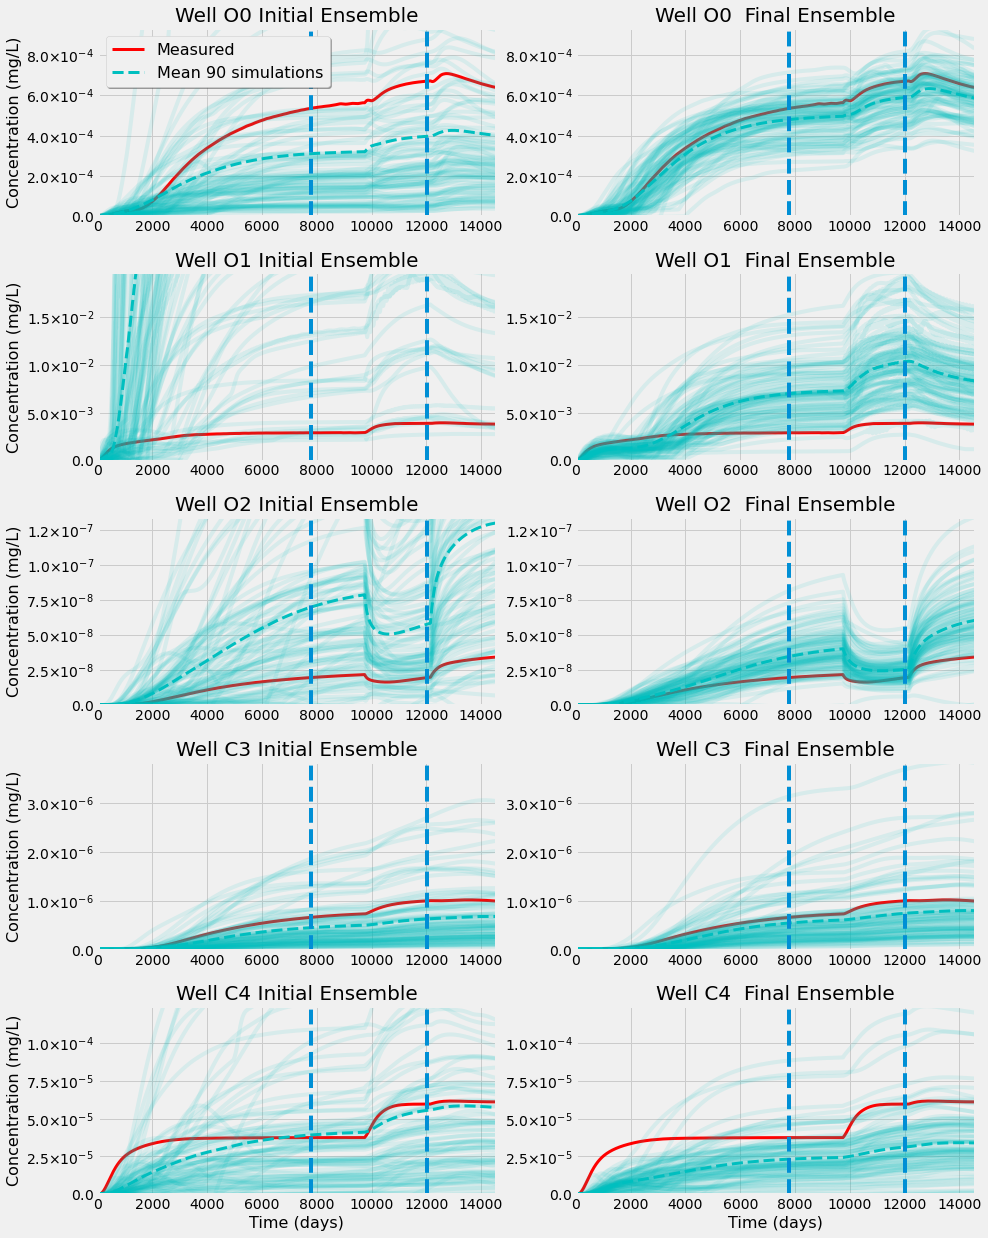

In [4]:
plt.figure(figsize=(14,20))
for i in range(wells):
    plt.subplot2grid((5, 2), (i, 1))
    data = measured.wells[i].get_well_data()
    plt.plot(data[0],data[1], '-r', label='Measured',linewidth=3)
    sum_ = np.zeros(len(data[1]))
    max_temp = 0
    for j in range(ensemble):
        plt.plot(data[0],observations[4].wells[i][j].get_well_data()[1],'-c',alpha=0.1)
        sum_ += observations[4].wells[i][j].get_well_data()[1] / ensemble
        
        if (max(observations[4].wells[i][j].get_well_data()[1]) >= max_temp) :
            max_temp = max(observations[4].wells[i][j].get_well_data()[1])
    plt.plot(data[0],sum_, '--c', label='Mean '+str(ensemble)+' simulations',linewidth=3)

    if i ==4:
        plt.xlabel('Time (days)',fontsize=16)
    #plt.ylabel('Concentration (mg/L)',fontsize=16)

    plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))        
    plt.xlim(0,max(data[0]))
    plt.ylim(0,max_temp)
    #plt.legend(fontsize=16,shadow=True,loc='upper left')

    plt.title(measured.wells[i].name+" Final Ensemble",fontsize=20)

    plt.axvline(x=data[0][int(min_*measured.wells[i].size)],linestyle='--')
    plt.axvline(x=data[0][int(max_*measured.wells[i].size)],linestyle='--')
    
    
    
    
    plt.subplot2grid((5, 2), (i, 0))
    data = measured.wells[i].get_well_data()
    plt.plot(data[0],data[1], '-r', label='Measured',linewidth=3)
    sum_ = np.zeros(len(data[1]))
    for j in range(ensemble):
        plt.plot(data[0],observations[0].wells[i][j].get_well_data()[1],'-c',alpha=0.1)
        sum_ += observations[0].wells[i][j].get_well_data()[1] / ensemble
    plt.plot(data[0],sum_, '--c', label='Mean '+str(ensemble)+' simulations',linewidth=3)


    if i ==4:
        plt.xlabel('Time (days)',fontsize=16)
    plt.ylabel('Concentration (mg/L)',fontsize=16)

    plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))        
    plt.xlim(0,max(data[0]))
    plt.ylim(0,max_temp)
    if i==0:
        plt.legend(fontsize=16,shadow=True,loc='upper left')

    plt.title(measured.wells[i].name+"Initial Ensemble",fontsize=20)

    plt.axvline(x=data[0][int(min_*measured.wells[i].size)],linestyle='--')
    plt.axvline(x=data[0][int(max_*measured.wells[i].size)],linestyle='--')


    

    
plt.subplots_adjust(hspace = 0.3)
plt.savefig("Figures/final_vs_initial_dampening.pdf",dpi=1200,format='pdf',bbox_inches='tight',pad_inches=None)
plt.show()    

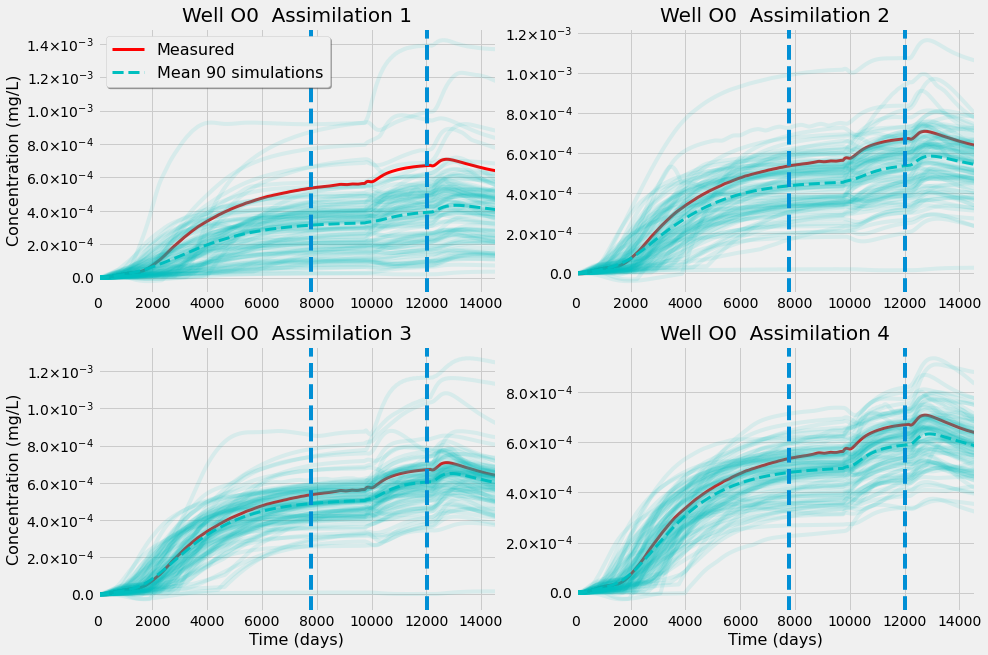

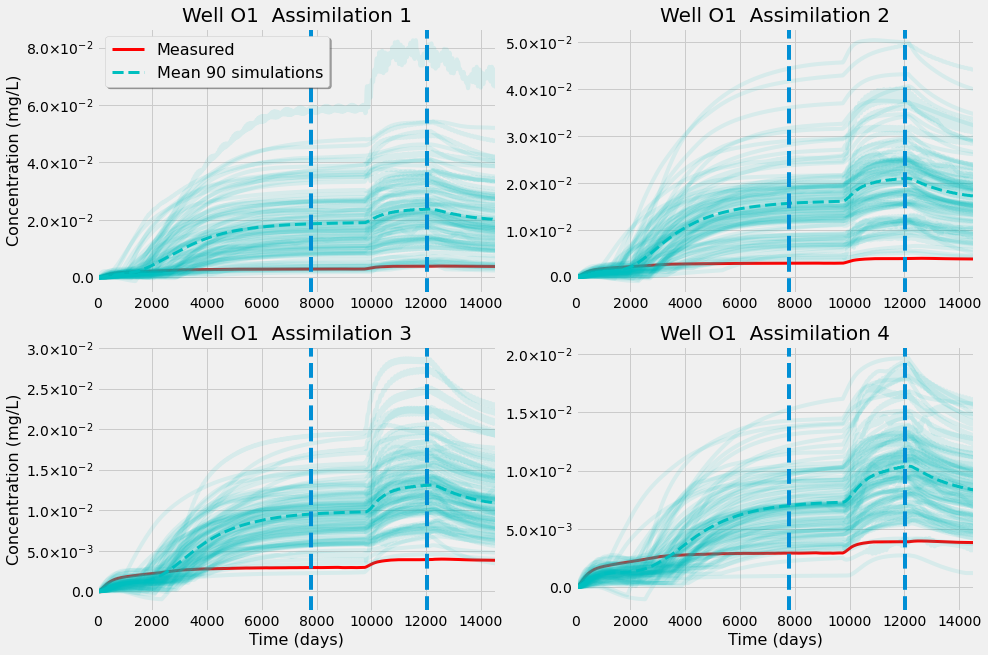

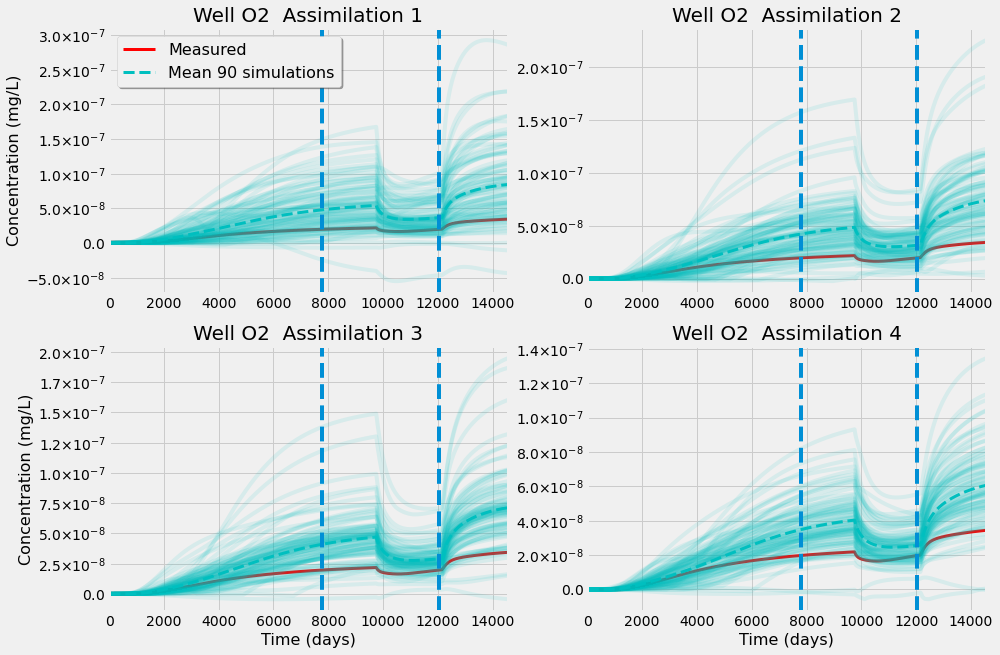

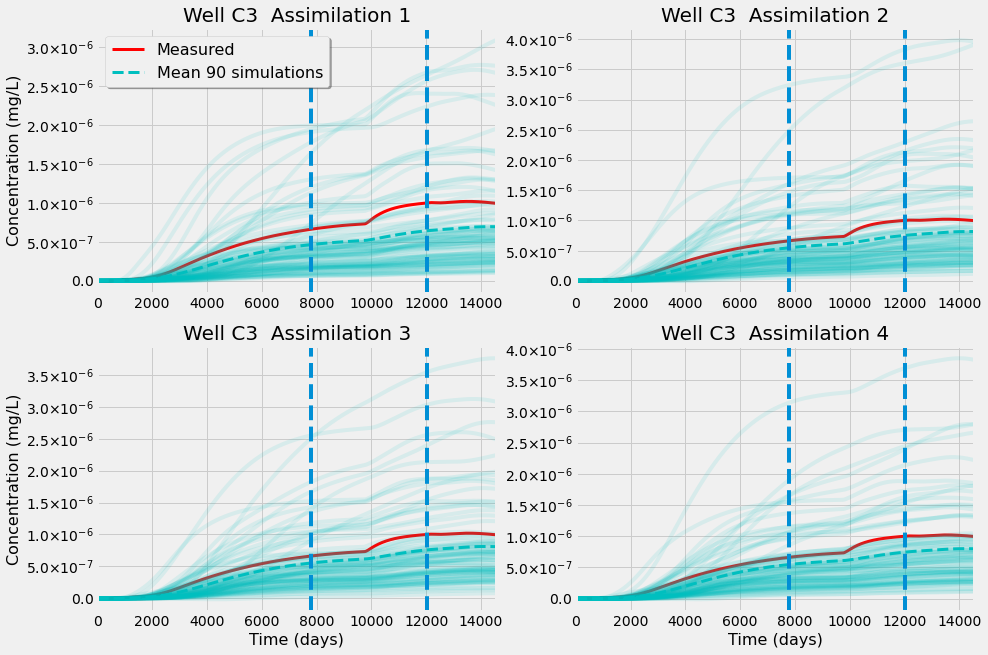

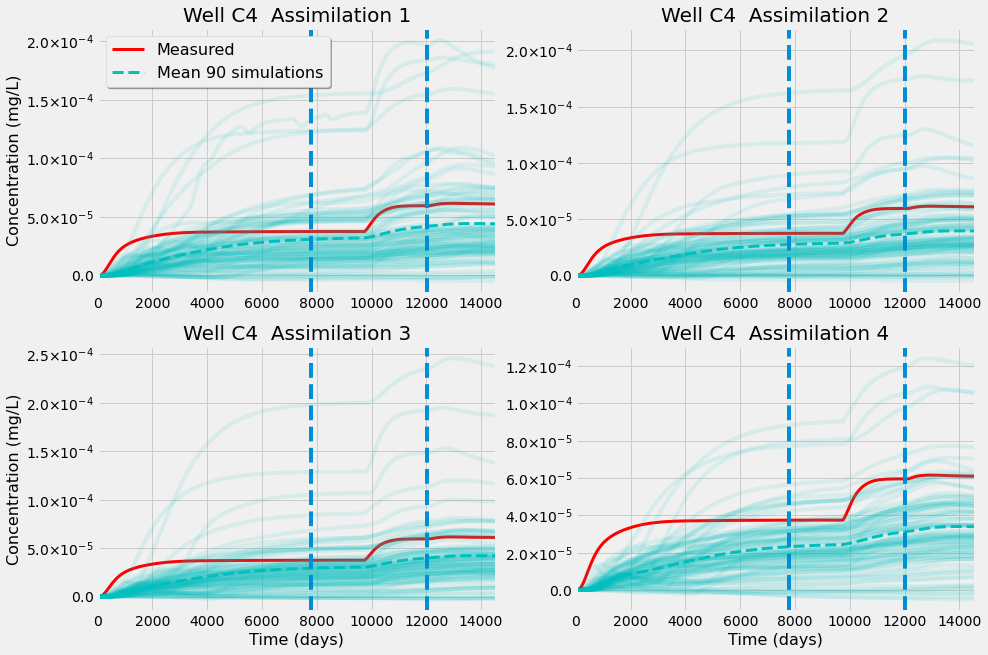

In [5]:
min_ = 0.6
max_ = 0.87

for i in range(wells):
    plt.figure(figsize=(14,10))
    plt.title(measured.wells[i].name,fontsize=20)

    for assim in range(n_assim-1):
        
        plt.subplot2grid((2, 2), (assim//2, assim%2))

        data = measured.wells[i].get_well_data()

        plt.plot(data[0],data[1], '-r', label='Measured',linewidth=3)
        sum_ = np.zeros(len(data[1]))
        for j in range(ensemble):
            plt.plot(data[0],observations[assim+1].wells[i][j].get_well_data()[1],'-c',alpha=0.1)
            sum_ += observations[assim+1].wells[i][j].get_well_data()[1] / ensemble
        plt.plot(data[0],sum_, '--c', label='Mean '+str(ensemble)+' simulations',linewidth=3)

        if (assim//2 == 1) :
            plt.xlabel('Time (days)',fontsize=16)
        if (assim%2 == 0) :
            plt.ylabel('Concentration (mg/L)',fontsize=16)

        plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))        
        plt.xlim(0,max(data[0]))
        
        if assim == 0:
            plt.legend(fontsize=16,shadow=True,loc='upper left')

        plt.title(measured.wells[i].name+" Assimilation "+str(assim+1),fontsize=20)

        plt.axvline(x=data[0][int(min_*measured.wells[i].size)],linestyle='--')
        plt.axvline(x=data[0][int(max_*measured.wells[i].size)],linestyle='--')

    plt.savefig("Figures/ensemble_evolution_"+str(i)+"_dampening.pdf",dpi=1200,format='pdf',bbox_inches='tight',pad_inches=None)
    plt.show()    

In [6]:
# Make a map of coordinate points, do not repeat it in title

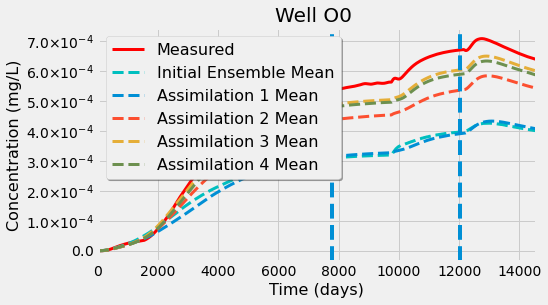

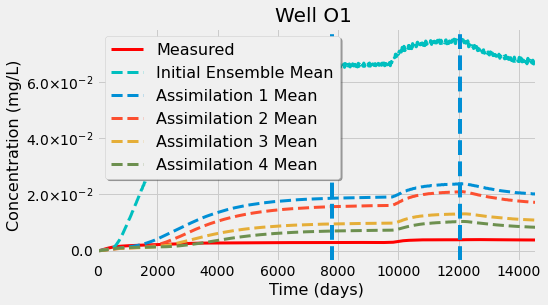

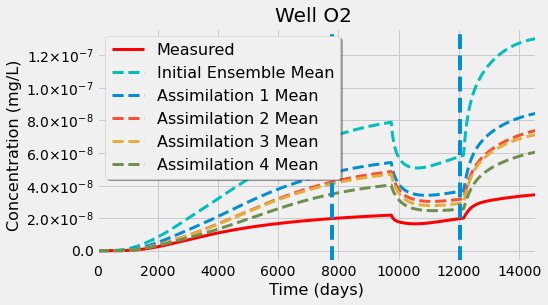

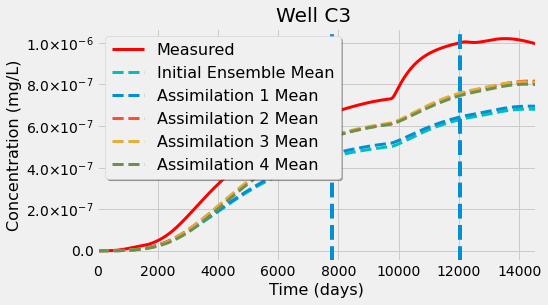

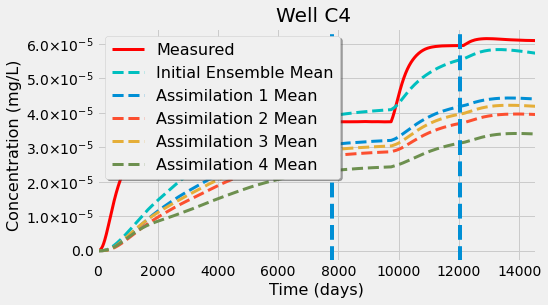

In [7]:
for i in range(wells):
    plt.figure(figsize=(7,4))
    data = measured.wells[i].get_well_data()

    plt.plot(data[0],data[1], '-r', label='Measured',linewidth=3)
        
    for assim in range(n_assim):
        sum_ = np.zeros(len(data[1]))
        for j in range(ensemble):
            sum_ += observations[assim].wells[i][j].get_well_data()[1] / ensemble
        if assim == 0 :
            plt.plot(data[0],sum_, '--c', label='Initial Ensemble Mean',linewidth=3)
        else :
            plt.plot(data[0],sum_, '--', label='Assimilation '+str(assim)+' Mean',linewidth=3)


    plt.xlabel('Time (days)',fontsize=16)
    plt.ylabel('Concentration (mg/L)',fontsize=16)
    #plt.ylim(0,2*max(data[1]))

    plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))        
    plt.xlim(0,max(data[0]))
    plt.legend(fontsize=16,shadow=True,loc='upper left')

    plt.title(measured.wells[i].name,fontsize=20)

    plt.axvline(x=data[0][int(min_*measured.wells[i].size)],linestyle='--')
    plt.axvline(x=data[0][int(max_*measured.wells[i].size)],linestyle='--')


    plt.show()    

# Calcul RMSE

In [8]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mae(predictions, targets):
    return (abs(predictions - targets)).mean()

def get_stats(x):
    return (np.quantile(x,0.5),np.quantile(x,0.25),np.quantile(x,0.75),np.std(x))

In [9]:
ref_puit = np.zeros((wells,int((max_*len(data[1])))-int(min_*len(data[1]))))
vali_puit = np.zeros((wells,int((len(data[1])))-int(max_*len(data[1]))))

for i in range(wells):
    ref_puit[i] = measured.wells[i].get_well_data()[1][int(min_*len(data[1])):int(max_*len(data[1]))]
    vali_puit[i] = measured.wells[i].get_well_data()[1][int(max_*len(data[1])):]



In [10]:
rmse_calibration = np.zeros((n_assim,wells,ensemble))
rmse_validation = np.zeros((n_assim,wells,ensemble))

for assim in range(n_assim):
    for j in range(wells):
        for i in range(ensemble):
            rmse_calibration[assim][j][i] = rmse(observations[assim].wells[j][i].get_well_data()[1][int(min_*len(data[1])):int(max_*len(data[1]))],ref_puit[j])
            rmse_validation[assim][j][i] = rmse(observations[assim].wells[j][i].get_well_data()[1][int(max_*len(data[1])):],vali_puit[j])


In [11]:
calibration = np.ones((n_assim,4,wells))
validation = np.ones((n_assim,4,wells))

temp = 0
for i in range(int(n_assim)):
    for j in range(wells): 
        calibration[j,:,i] = get_stats(rmse_calibration[i][j])
        validation[j,:,i] = get_stats(rmse_validation[i][j])
        temp += 1


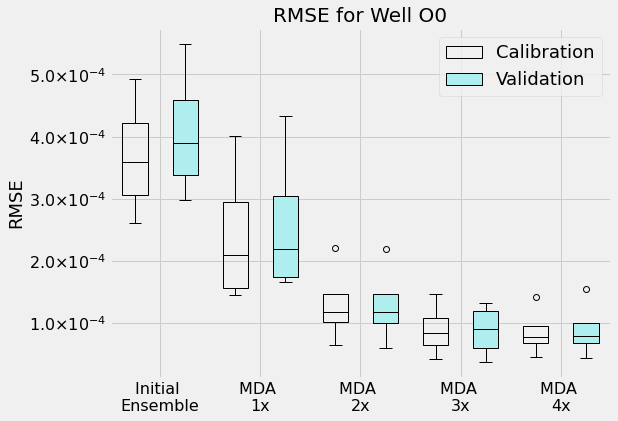

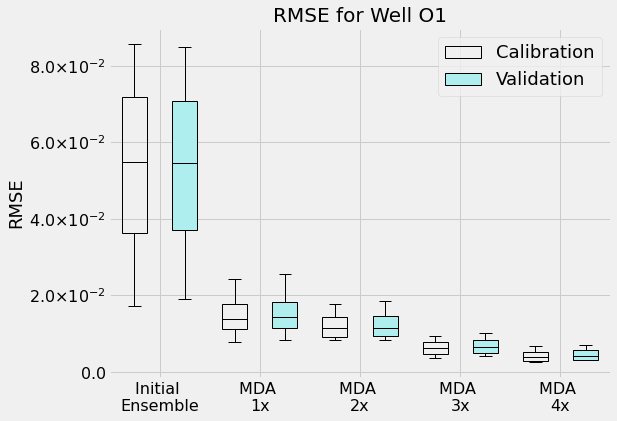

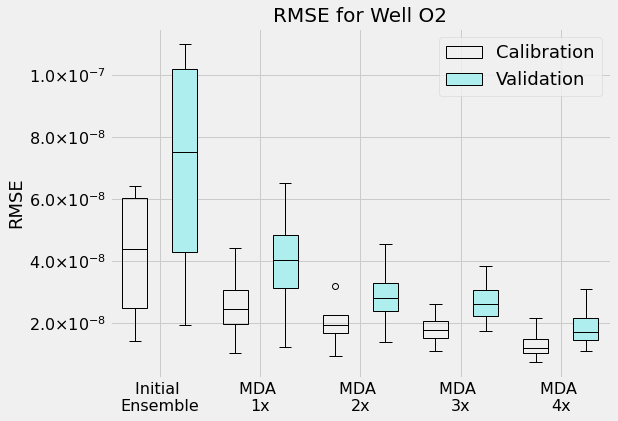

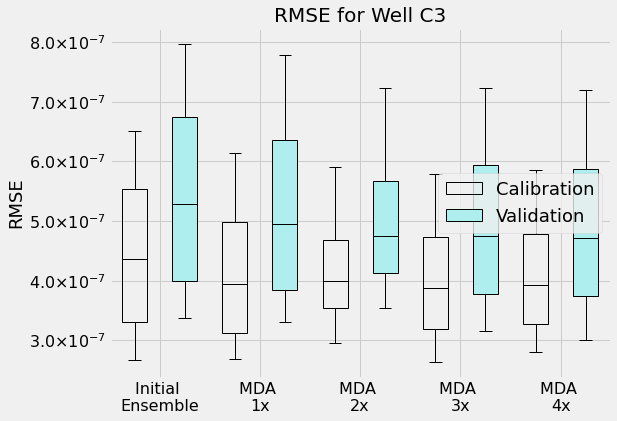

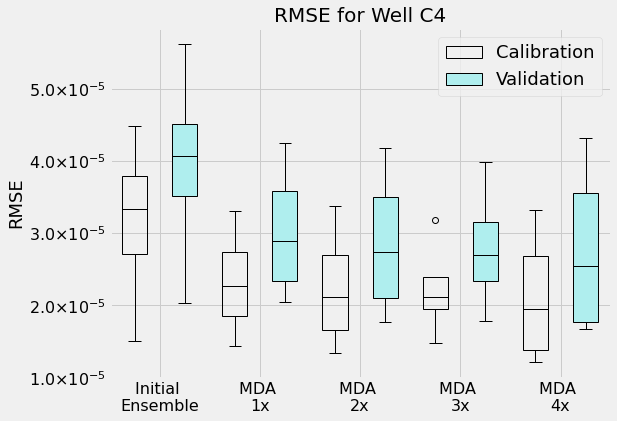

In [12]:
plt.style.use('fivethirtyeight')

name = ["Initial \nEnsemble","MDA \n1x","MDA \n2x","MDA \n3x","MDA \n4x","","","","",""]


    
for i in range(5):

    plt.figure(figsize=(8,6))
    box1 = plt.boxplot(np.hstack((calibration[i],validation[i])),labels=name, patch_artist=True,
                      positions= [0,2,4,6,8,1,3,5,7,9] )

    
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color='black')
            
    c1 = 'none'
    c2 = 'paleturquoise'


    plt.setp(box1["boxes"][0], facecolor=c1)
    plt.setp(box1["boxes"][1], facecolor=c1)
    plt.setp(box1["boxes"][2], facecolor=c1)
    plt.setp(box1["boxes"][3], facecolor=c1)
    plt.setp(box1["boxes"][4], facecolor=c1)
    plt.setp(box1["boxes"][5], facecolor=c2)
    plt.setp(box1["boxes"][6], facecolor=c2)
    plt.setp(box1["boxes"][7], facecolor=c2)
    plt.setp(box1["boxes"][8], facecolor=c2)
    plt.setp(box1["boxes"][9], facecolor=c2)
    

    plt.xticks([0.5,2.5,4.5,6.5,8.5])

    plt.ylabel('RMSE', fontsize=18)
    plt.tick_params(labelsize=16)
    plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))        

    plt.legend((box1["boxes"][0],box1["boxes"][5]),("Calibration","Validation"), fontsize=18)
    
    if i < 3:
        w = "O"
    else :
        w = "C"
    plt.title("RMSE for Well "+w+str(i),fontsize=20)

    plt.savefig("Figures/rmse_well_"+str(i)+".pdf",dpi=1200,format='pdf',bbox_inches='tight',pad_inches=None)
    plt.show()

In [13]:
# RMSE is skewed by few extreme data prediction in the ensemble for C3

In [14]:
mae_calibration = np.zeros((n_assim,wells,ensemble))
mae_validation = np.zeros((n_assim,wells,ensemble))

for assim in range(n_assim):
    for j in range(wells):
        for i in range(ensemble):
            mae_calibration[assim][j][i] = mae(observations[assim].wells[j][i].get_well_data()[1][int(min_*len(data[1])):int(max_*len(data[1]))],ref_puit[j])
            mae_validation[assim][j][i] = mae(observations[assim].wells[j][i].get_well_data()[1][int(max_*len(data[1])):],vali_puit[j])


In [15]:
calibration = np.ones((n_assim,4,wells))
validation = np.ones((n_assim,4,wells))

temp = 0
for i in range(int(n_assim)):
    for j in range(wells): 
        calibration[j,:,i] = get_stats(mae_calibration[i][j])
        validation[j,:,i] = get_stats(mae_validation[i][j])
        temp += 1


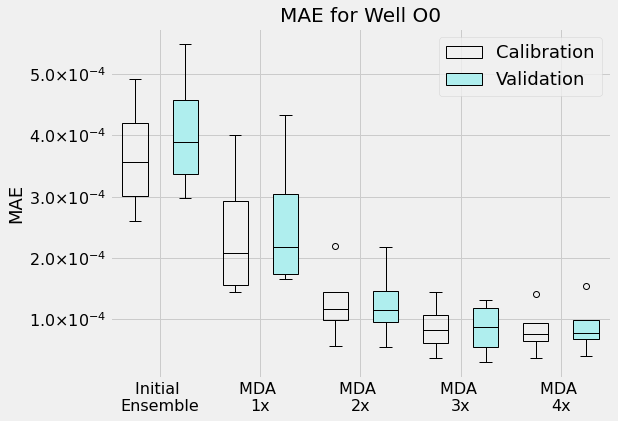

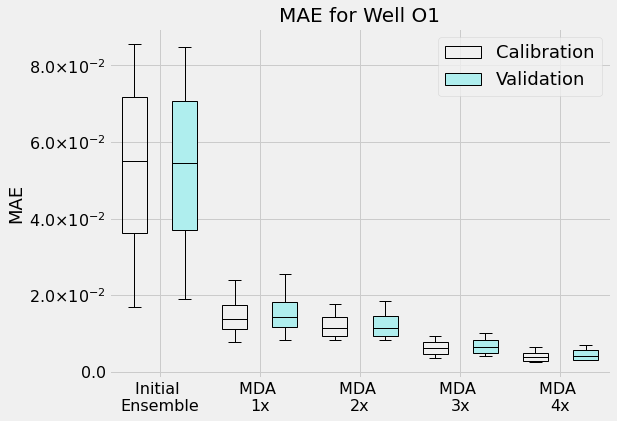

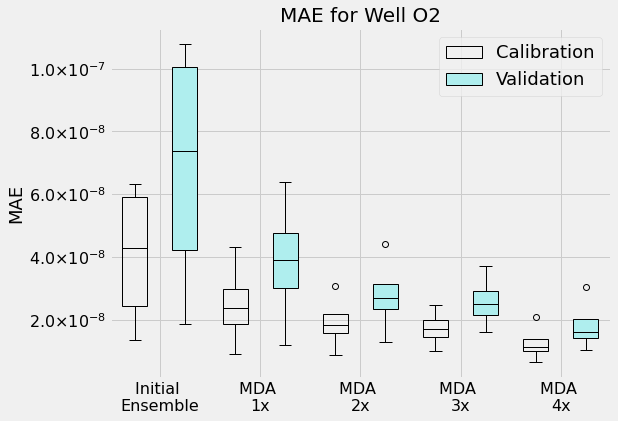

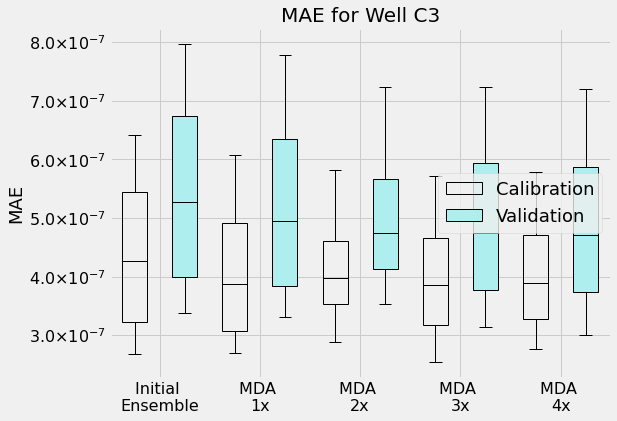

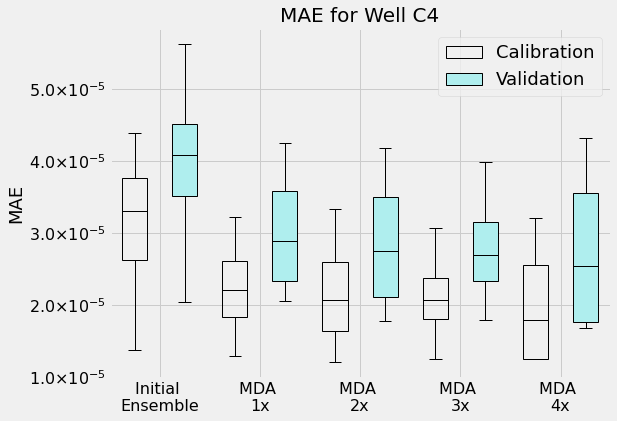

In [16]:


name = ["Initial \nEnsemble","MDA \n1x","MDA \n2x","MDA \n3x","MDA \n4x","","","","",""]


    
for i in range(5):

    plt.figure(figsize=(8,6))
    box1 = plt.boxplot(np.hstack((calibration[i],validation[i])),labels=name, patch_artist=True,
                      positions= [0,2,4,6,8,1,3,5,7,9] )

    
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color='black')
            
    c1 = 'none'
    c2 = 'paleturquoise'


    plt.setp(box1["boxes"][0], facecolor=c1)
    plt.setp(box1["boxes"][1], facecolor=c1)
    plt.setp(box1["boxes"][2], facecolor=c1)
    plt.setp(box1["boxes"][3], facecolor=c1)
    plt.setp(box1["boxes"][4], facecolor=c1)
    plt.setp(box1["boxes"][5], facecolor=c2)
    plt.setp(box1["boxes"][6], facecolor=c2)
    plt.setp(box1["boxes"][7], facecolor=c2)
    plt.setp(box1["boxes"][8], facecolor=c2)
    plt.setp(box1["boxes"][9], facecolor=c2)
    

    plt.xticks([0.5,2.5,4.5,6.5,8.5])

    plt.ylabel('MAE', fontsize=18)
    plt.tick_params(labelsize=16)
    plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))        

    plt.legend((box1["boxes"][0],box1["boxes"][5]),("Calibration","Validation"), fontsize=18)
    
    if i < 3:
        w = "O"
    else :
        w = "C"
    plt.title("MAE for Well "+w+str(i),fontsize=20)

    plt.savefig("Figures/mae_well_"+str(i)+".pdf",dpi=1200,format='pdf',bbox_inches='tight',pad_inches=None)
    plt.show()

In [17]:
import os
import re

filename='Data/Reference/fgen92'

z = 16
y = 25
simu = 42
cells_3d_model = 35301

k_ensemble = np.zeros(cells_3d_model)


k  = open(filename+'.asc', 'r')
iter_ = 0

for line in k:
    if iter_ == 1 :
        words = re.split(',|  | ',line)
        while '' in words:
            del words[words.index('')]

        i = int(words[0])
        j = int(words[2])
        break
    iter_ += 1

iter_ = 0
for line in k:
    k_ensemble[iter_] = float(line)
    iter_ += 1

k.close()


k_ref = k_ensemble 
k_ref = k_ref.reshape(21,41,41)


In [18]:
"""filename='Data/Reference/k_fields/fgen92_sim'
ensemble_number = 90
cells_3d_model = 35301

k1 = ID.import_permeability_field(filename,ensemble_number, cells_3d_model)[0].reshape(21,41,41)
"""

"filename='Data/Reference/k_fields/fgen92_sim'\nensemble_number = 90\ncells_3d_model = 35301\n\nk1 = ID.import_permeability_field(filename,ensemble_number, cells_3d_model)[0].reshape(21,41,41)\n"

In [19]:
filename='Data/Reference/k_fields/fgen92_sim'


k_ensemble = np.zeros(cells_3d_model)


k  = open(filename+str(simu)+'.asc', 'r')
iter_ = 0

for line in k:
    if iter_ == 1 :
        words = re.split(',|  | ',line)
        while '' in words:
            del words[words.index('')]

        i = int(words[0])
        j = int(words[2])
        break
    iter_ += 1

iter_ = 0
for line in k:
    k_ensemble[iter_] = float(line)
    iter_ += 1

k.close()


k1 = k_ensemble 
k1 = k1.reshape(21,41,41)

In [20]:
k_ensemble = np.zeros((4,cells_3d_model))

for assim in range(4):
    filename='Data/k_fields_update_'+str(assim+1)+'/fgen92_sim'


    k  = open(filename+str(simu)+'.asc', 'r')
    iter_ = 0

    for line in k:
        if iter_ == 1 :
            words = re.split(',|  | ',line)
            while '' in words:
                del words[words.index('')]

            i = int(words[0])
            j = int(words[2])
            break
        iter_ += 1

    iter_ = 0
    for line in k:
        k_ensemble[assim][iter_] = float(line)
        iter_ += 1

    k.close()

In [21]:
k2 = k_ensemble[0] 
k2 = k2.reshape(21,41,41)

k3 = k_ensemble[1] 
k3 = k3.reshape(21,41,41)

k4 = k_ensemble[2] 
k4 = k4.reshape(21,41,41)

k5 = k_ensemble[3] 
k5 = k5.reshape(21,41,41)

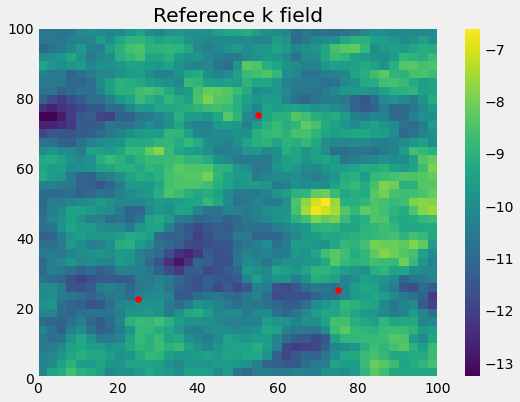

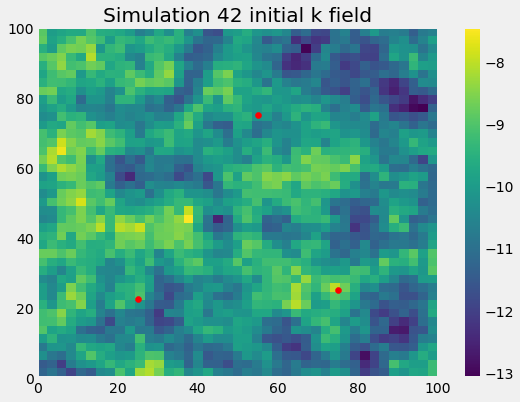

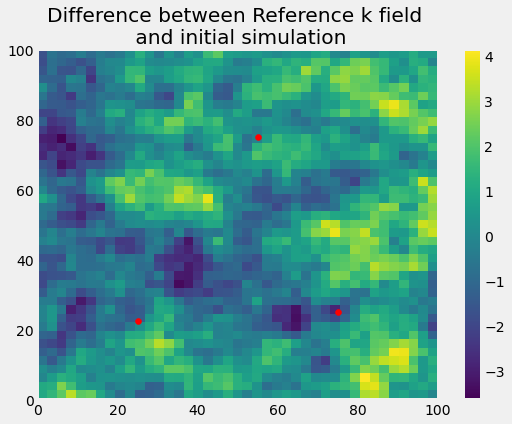

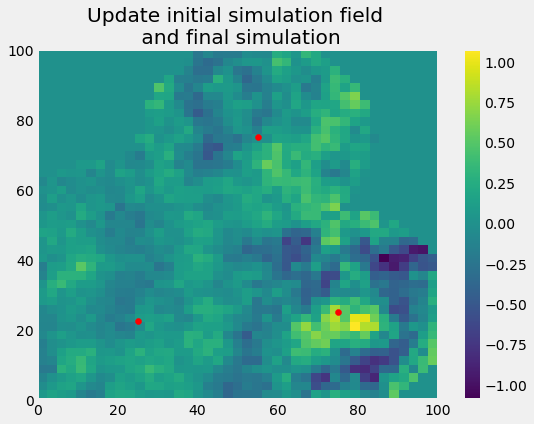

In [22]:
def plt_section_z(k,kref,z,title):
    plt.figure(figsize=(8,6))

    plt.imshow(k[z]-kref[z],aspect='auto',origin='lower',extent=[0,100,0,100],cmap='viridis')
    plt.colorbar()
    
    plt.scatter(22*2.5,30*2.5,c='red')
    plt.scatter(30*2.5,10*2.5,c='red')
    plt.scatter(10*2.5,9*2.5,c='red')
    plt.title(title)
    plt.grid(False)
    
    plt.show()

def plt_section_y(k,kref,y,title):
    plt.figure(figsize=(10,3))
    plt.imshow(k[:,y,:]-kref[:,y,:],aspect='auto',origin='lower',extent=[0,100,0,20],cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.grid(False)
    plt.show()


    
plt.figure(figsize=(8,6))

plt.imshow(k_ref[z],aspect='auto',origin='lower',extent=[0,100,0,100],cmap='viridis')
plt.colorbar()

plt.scatter(22*2.5,30*2.5,c='red')
plt.scatter(30*2.5,10*2.5,c='red')
plt.scatter(10*2.5,9*2.5,c='red')
plt.title('Reference k field')
plt.grid(False)
plt.show()

plt.figure(figsize=(8,6))

plt.imshow(k1[z],aspect='auto',origin='lower',extent=[0,100,0,100],cmap='viridis')
plt.colorbar()

plt.scatter(22*2.5,30*2.5,c='red')
plt.scatter(30*2.5,10*2.5,c='red')
plt.scatter(10*2.5,9*2.5,c='red')
plt.title('Simulation 42 initial k field')
plt.grid(False)
plt.show()

    
plt_section_z(k_ref,k1,z, "Difference between Reference k field \n and initial simulation")  
plt_section_z(k1,k5,z, "Update initial simulation field \n and final simulation")

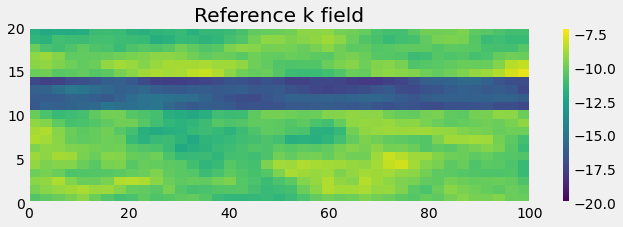

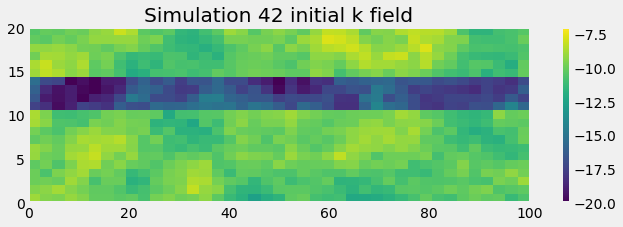

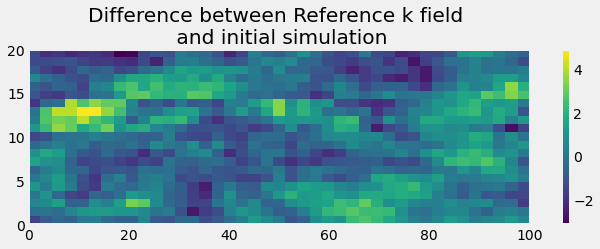

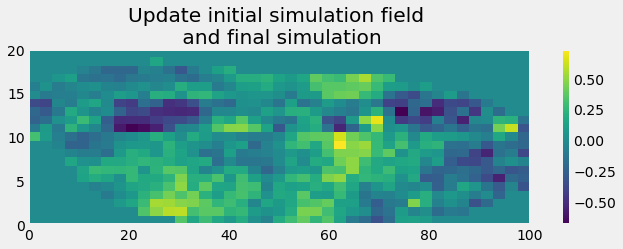

In [23]:
plt.figure(figsize=(10,3))
plt.imshow(k_ref[:,y,:],aspect='auto',origin='lower',extent=[0,100,0,20],cmap='viridis',vmin=-7,vmax=-20)
plt.colorbar()
plt.title('Reference k field')
plt.grid(False)
plt.show()

plt.figure(figsize=(10,3))
plt.imshow(k1[:,y,:],aspect='auto',origin='lower',extent=[0,100,0,20],cmap='viridis',vmin=-7,vmax=-20)
plt.colorbar()
plt.title('Simulation 42 initial k field')
plt.grid(False)
plt.show()

plt_section_y(k_ref,k1,y, "Difference between Reference k field \n and initial simulation")
plt_section_y(k1,k5,y, "Update initial simulation field \n and final simulation")

In [24]:
# SSIM test

In [52]:
import numpy as np
import matplotlib.pyplot as plt


def RMSE_matrix_permea(matrix1,matrix2,w_x,w_y,w_z):

    """
    
    Compute the structural similarity between two matrix
    
    w_x, w_y and w_z are the windows to compute the statistics in
    each matrix
    
    """
    
    nz, ny, nx = matrix1.shape 
    
    nz = nz - w_z   
    ny = ny - w_y
    nx = nx - w_x
    
    SSIM = np.zeros(nx*ny*nz)
    
    iit = 0
    for k in range(nz):
        for j in range(ny):
            for i in range(nx):
    
                it = 0
                temp1 = np.zeros(w_x*w_y*w_z)
                temp2 = np.zeros(w_x*w_y*w_z)
                for x in range(w_x) :
                    for y in range(w_y) :
                        for z in range(w_z) :
                            temp1[it] = matrix1[z+k,y+j,x+i]
                            temp2[it] = matrix2[z+k,y+j,x+i]
                            it+=1

                

                SSIM[iit] = np.mean( (temp2 - temp1) / temp1)
                iit+=1
    
    return (SSIM)



In [53]:

SSIM_ref_1 = RMSE_matrix_permea(k_ref,k1,5,5,3)
SSIM_ref_2 = RMSE_matrix_permea(k_ref,k2,5,5,3)
SSIM_ref_3 = RMSE_matrix_permea(k_ref,k3,5,5,3)
SSIM_ref_4 = RMSE_matrix_permea(k_ref,k4,5,5,3)
SSIM_ref_5 = RMSE_matrix_permea(k_ref,k5,5,5,3)

{'whiskers': [<matplotlib.lines.Line2D at 0x267d8700df0>,
 'caps': [<matplotlib.lines.Line2D at 0x267d8700400>,
 'boxes': [<matplotlib.lines.Line2D at 0x267d9aafd30>],
 'medians': [<matplotlib.lines.Line2D at 0x267da213a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x267da213940>],
 'means': []}

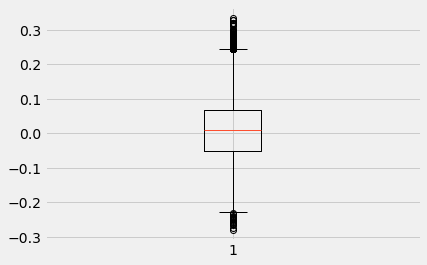

In [54]:
plt.boxplot(SSIM_ref_1)

{'whiskers': [<matplotlib.lines.Line2D at 0x267d86727f0>,
 'caps': [<matplotlib.lines.Line2D at 0x267d8672eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x267d8672490>],
 'medians': [<matplotlib.lines.Line2D at 0x267d72c2310>],
 'fliers': [<matplotlib.lines.Line2D at 0x267d72c2940>],
 'means': []}

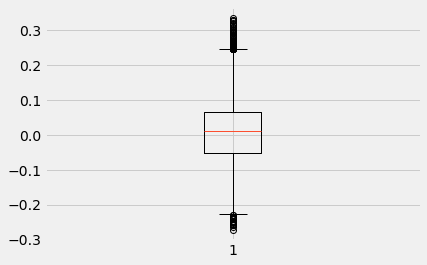

In [55]:
plt.boxplot(SSIM_ref_5)

0.010965430748061883 0.010239107073805025


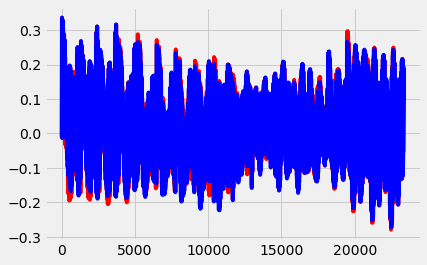

In [56]:
plt.plot(SSIM_ref_1,c='r')
plt.plot(SSIM_ref_5,c='b')
print(np.mean(SSIM_ref_1),np.mean(SSIM_ref_5))